
# Project: Investigate a Dataset (TMDB 10000 Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> Here we have a dataset to investigate "TMDb Movie Database" a dataset of about 10,000 movies, here we can answer questions as, including user ratings and revenue. The questions that I will explore over the course of the report:

• Q1 : What kind of properties are associated with movies that have high profit?

 - High profit movies average budget, average revenue and average popularity ?    
 - In which year the movies makes the most profit ?   
 - High profit movies genre, casts, directors and production companies ?

• Q2 : What kind of properties are associated with movies that have high ratings?

  - High Ratings movies average budget, average revenue, and average popularity ?
   
  - High Ratings movies genre,directors and production companies ?
   

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling

- In this section of the report:

 • load in the data
 
 • check for cleanliness
 
 • then trim and cleandataset for analysis.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head(4)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09


In [3]:
# To check the size of the dataset
df.shape

(10866, 21)

Based on the table shown below , Datatype of columns:

release_date is not using the date datatype, budget_adj and revenue_adj are float datatype so we will changeing datatypes in the data cleaning step.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

Based on the table shown below, 50% of the value in budget and revenue are of zero value. The minimum value for runtime is 0 which means that there could be a number of values of zero value in runtime.


In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Number of missing values in the dataset:

There are number of columns which have null values according to the resualt below : imdb_id , cast,homepage , director , tagline , keywords,overview ,genres, production_companies. Some of columns have a huge number of missing values such as : homepage ,tagline , keywords, production_companies but most of them i will drop since they not necessary for our questions.


In [6]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Duplicate rows in the dataset

According to the cell below there is only 1 duplicate row which i will drop next section.

In [7]:
#Number of duplicate rows

df.duplicated().sum()

1

Number of unique values for the dataset

To see the total number of unique values for each column.

In [8]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Number of rows with missing values

To check the number of rows with at least one column with missing value.

In [9]:
df.isnull().any(axis=1).sum()

8874

Number of zero Values in runtime, budget_adj, revenue_adj , we show that in above.

I need to get the total numer of zero values to decide whether to drop the zero values in the dataset.

In [10]:
col_with_zero = ['runtime','budget_adj','revenue_adj']
for i in col_with_zero:
    zero_count = (df[i] == 0).sum()
    print('`{}` have {} zero values'.format(i,zero_count))

`runtime` have 31 zero values
`budget_adj` have 5696 zero values
`revenue_adj` have 6016 zero values


### Data Cleaning

• Drop unimportant columns.

• Drop duplicates rows.

• Replace zero values with NaN


• Replace NaN values with mean.

• Add new column profit.

• Convert release_date column to Date datatype.



#### Drop Unimportant Columns

Coulmns i will drop : id, imdb_id, homepage, tagline, keywords,overview, vote_count,budget and revenue , i will use “_adj” which show the budget and revenue of the associated movie in terms of 2010 dollars


In [11]:
df.drop(['id','imdb_id','homepage','tagline','keywords','overview','vote_count','budget'] , axis=1 , inplace=True)
df.head(4)

,popularity,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,7.5,2015,1.839999e+08,1.902723e+09


In [12]:
df.drop(['revenue'] , axis=1 , inplace=True)

#### Drop Duplicates Rows


In [13]:
# drop duplicate rows
df.drop_duplicates(inplace=True)
# check number of duplicates -it should be 0
df.duplicated().sum()

0

#### Replce zero values with NaN

In [14]:
# creeate a list columns with zero values.
col_with_zero = ['runtime','budget_adj','revenue_adj']

# replace zero values with NaN for columns in the list.
df[col_with_zero] = df[col_with_zero].replace(0,np.NAN)

# confirme the changes
df.describe()

,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,10865.000000,10834.000000,10865.000000,10865.000000,5.169000e+03,4.849000e+03
mean,0.646446,102.363855,5.975012,2001.321859,3.688907e+07,1.151009e+08
std,1.000231,30.948225,0.935138,12.813260,4.196096e+07,1.988557e+08
min,0.000065,2.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.207575,90.000000,5.400000,1995.000000,8.102293e+06,1.046585e+07
50%,0.383831,99.000000,6.000000,2006.000000,2.271505e+07,4.395666e+07
75%,0.713857,112.000000,6.600000,2011.000000,5.008384e+07,1.316482e+08
max,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Replace NaN values with mean

In [15]:
df['runtime'].fillna(df['runtime'].mean() , inplace = True)
df['budget_adj'].fillna(df['budget_adj'].mean() , inplace = True)
df['revenue_adj'].fillna(df['revenue_adj'].mean() , inplace = True)

In [16]:
# drop rows with null values 

df.dropna(inplace=True)
df.isnull().sum()

popularity              0
original_title          0
cast                    0
director                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
# convert release_data to datetime formate
df['release_date']=pd.to_datetime(df['release_date'])
# confirm changes
df.dtypes

popularity                     float64
original_title                  object
cast                            object
director                        object
runtime                        float64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

#### Add New Column profit

In [18]:
# adding new column profit calculated using revenue minus budget 
df['profit'] = df['revenue_adj'] - df['budget_adj']
df.head(1)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09


In [19]:
df.shape

(9772, 13)

<a id='eda'></a>
## Exploratory Data Analysis

Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section.


### Q1: What kind of properties are associated with movies that have high profit?

In order to analyze on the properties that are associated with movies that have high profit, I will filter the dataset to movies that made profit of more than or equal 100 Million dollars.



In [20]:
# create new dataframe by filter to movies that made profit of more than 100Million dollars 
high_profit_movie = df.query('profit >= 100000000')

high_profit_movie.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08


In [21]:
# detailes of highest profit movie
highest = high_profit_movie['profit'].idxmax()
highest_details = pd.DataFrame(high_profit_movie.loc[highest])
highest_details

,1329
popularity,12.0379
original_title,Star Wars
cast,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director,George Lucas
runtime,121
genres,Adventure|Action|Science Fiction
production_companies,Lucasfilm|Twentieth Century Fox Film Corporation
release_date,1977-03-20 00:00:00
vote_average,7.9
release_year,1977


Star Wars movie have the highest profit by 2.75 Billion dollars 

In [22]:
# the average popularity of the movies
high_profit_movie['popularity'].mean()

1.3632681689765438

###### Based on the above, the average popularity for high profit movies is 1.363 million. Let's use visualization to see the distribution of the popularity.

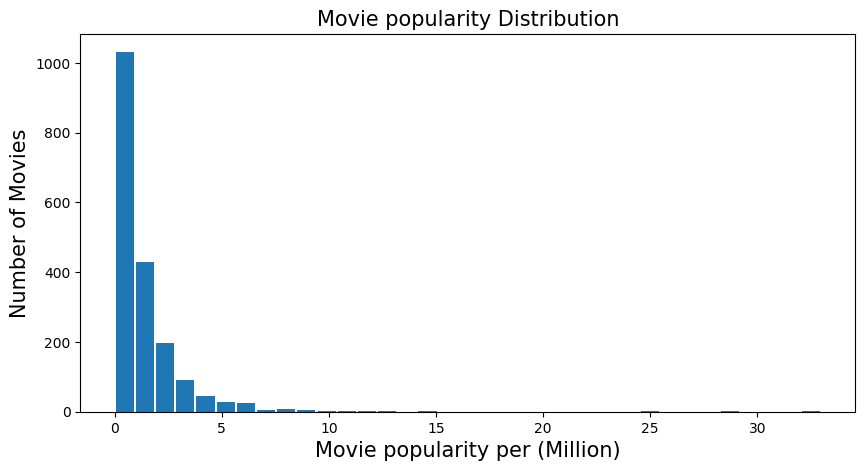

In [48]:
# create histogram to see the distribution of the popularity 
plt.figure(figsize=(10,5), dpi = 100)
plt.hist(high_profit_movie['popularity'], rwidth = 0.9, bins =35)
plt.title('Movie popularity Distribution', fontsize=15)
plt.xlabel('Movie popularity per (Million)', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15);
plt.show()

In [24]:
# the average budget of the movies
high_profit_movie['budget_adj'].mean()

44455212.75309232

Based on the above, the average budget for high revenue movies is around 44 Million dollars ($44,455,212).


In [25]:
# the average revenue of the movies
high_profit_movie['revenue_adj'].mean()

263993138.44169104

Based on the above, the average revenue for high revenue movies is around 263 Million dollars. ($263,993,138).



In [26]:
# release year have highest profit
profit_year = high_profit_movie.groupby('release_year')['profit'].sum()
profit_year.idxmax()

2013

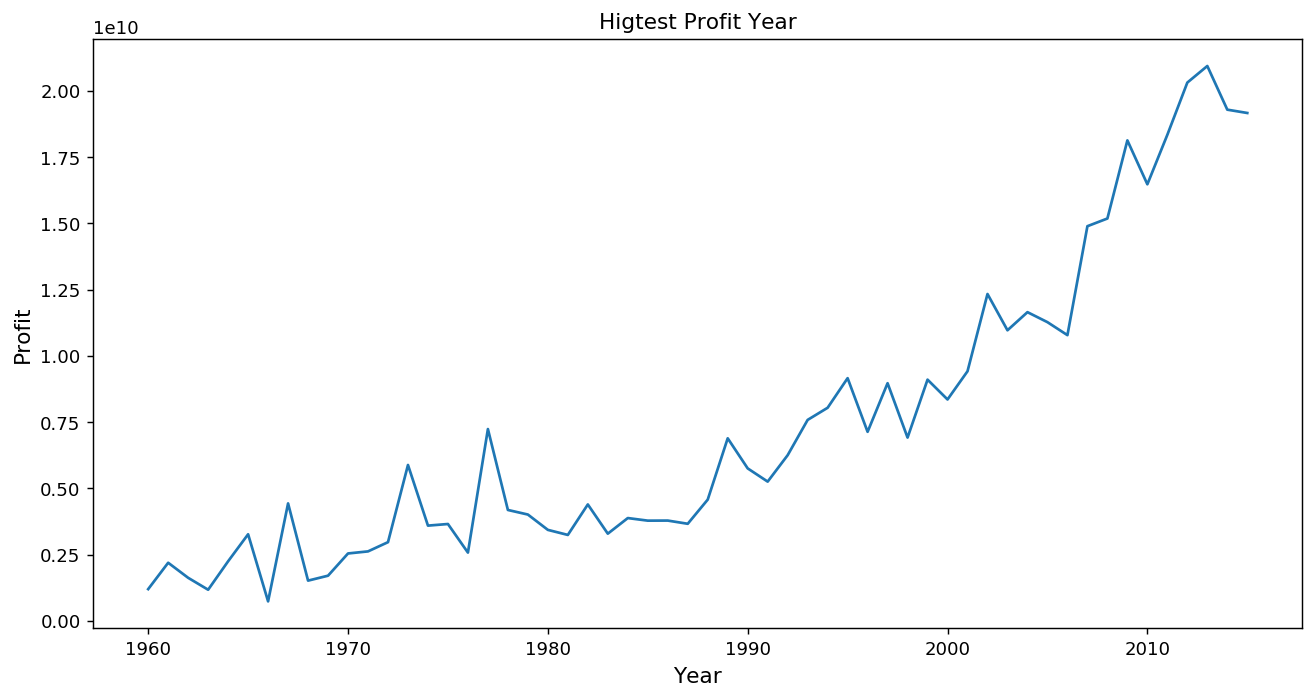

In [53]:
# Figure size
plt.figure(figsize=(12,6), dpi = 130)
# Plot line Chart
plt.plot(profit_year)
# Title
plt.title('Higtest Profit Year')
# x-axis
plt.xlabel('Year', fontsize = 12)
# y-axis
plt.ylabel('Profit', fontsize = 12);

Based on the above, we can see that the movies makes the highest profits in year 2013.


In [28]:
def extract_proft_data(column):

    data = high_profit_movie[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [29]:
# Get top 10 director

director = extract_proft_data('director')
director.head(10)

Steven Spielberg     23
Robert Zemeckis      13
Ron Howard           12
Tim Burton            9
Peter Jackson         9
Ridley Scott          9
Clint Eastwood        9
Michael Bay           8
Steven Soderbergh     8
Wes Craven            7
dtype: int64

Steven Spielberg (23 movies) is the top director that makes the most movies for the 55 years between 1960 to 2015 with high profit followed by Robert Zemeckis with 13 movies and Ron Howard with 12 movies.



In [30]:
# get top 10 casts
cast = extract_proft_data('cast')
cast.head(15)

Tom Cruise            27
Tom Hanks             22
Samuel L. Jackson     21
Bruce Willis          20
Sylvester Stallone    19
Brad Pitt             18
Cameron Diaz          17
Eddie Murphy          17
Adam Sandler          17
Robert De Niro        17
Harrison Ford         17
Jim Carrey            16
Ving Rhames           15
Robin Williams        15
Gary Oldman           15
dtype: int64

The top two male actors with more than 20 movies are Tom Cruise (27 movies) and Tom Hanks (22 movies). As for female actress are Cameron Diaz (17 movies). Seems like there are more high revenue movies actors than actress as out of the 15 cast from the above list there are only 1 female.



In [31]:
# Get top 10 production companies
production_companies = extract_proft_data('production_companies')
production_companies.head(10)

Universal Pictures                        139
Warner Bros.                              136
Paramount Pictures                        131
Twentieth Century Fox Film Corporation    111
Columbia Pictures                          68
Walt Disney Pictures                       65
Metro-Goldwyn-Mayer (MGM)                  51
Columbia Pictures Corporation              49
New Line Cinema                            46
Touchstone Pictures                        40
dtype: int64

The top production is Universal Pictures (139 movies), Warner Bros (136 movies) and Paramount Picture (131 movies). Amazing that the top three production companies produces more than 400 movies for the 55 years between 1960 to 2015 and they are also the ones that top the production companies with high profit movies list.



In [32]:
# Get top 10 genres
director = extract_proft_data('genres')
director.head(10)

Drama              721
Thriller           591
Comedy             589
Action             570
Adventure          414
Horror             330
Science Fiction    302
Romance            261
Crime              258
Family             225
dtype: int64

Drama movies have the highest profit with 749 movies followed by Comedy with 613 movies and Thriller with 612 movies, Surprisingly Action movies and Adventure wich have the highest popularity they come in fourth and fifth place in terms of the number of most profitable movies.





### Q2 : What kind of properties are associated with movies that have high ratings??

In order to analyze on the properties that are associated with movies that have high vote average, I will filter the dataset to movies that made vote average equal or more than 7.0 .



In [33]:
# create new dataframe by filter to movies that made vote of more than or equal to 7.0   
high_vote = df.query('vote_average >= 7.0')

high_vote.head(3)

,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_average,release_year,budget_adj,revenue_adj,profit
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [52]:
# the average popularity of the movies
high_vote['popularity'].mean()

1.256646525757574

Based on the above, the average popularity for high vote movies is 1.256 million. Let's use visualization to see the distribution of the popularity.



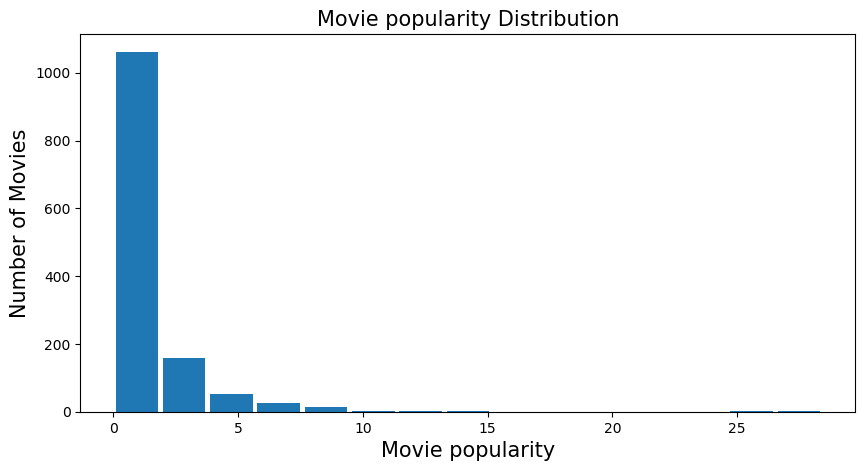

In [58]:
# create histogram to see the distribution of the popularity 
plt.figure(figsize=(10,5), dpi = 100)
# x-axis 
plt.xlabel('Movie popularity', fontsize = 15)
# y-axis 
plt.ylabel('Number of Movies', fontsize=15)
# distribution title
plt.title('Movie popularity Distribution', fontsize=15)

# Plot the histogram
plt.hist(high_vote['popularity'], rwidth = 0.9, bins =15)
# Displays the plot
plt.show()

In [36]:
# the average budget of the movies
high_vote['budget_adj'].mean()

39348575.58057168

Based on the above, the average budget for high vote movies is around 39.3 Million dollars ($39,348,575).



In [37]:
# the average revenue of the movies
high_vote['revenue_adj'].mean()

171555783.4690741

Based on the above, the average revenue for high vote movies is around 171 Million dollars. ($171,555,783).



In [38]:
highest = high_vote['vote_average'].idxmax()
highest_details = pd.DataFrame(high_vote.loc[highest])
highest_details

,6911
popularity,0.21201
original_title,Pink Floyd: Pulse
cast,David Gilmour|Nick Mason|Richard Wright|Sam Br...
director,David Mallet
runtime,145
genres,Music
production_companies,SMV Enterprises|Columbia Music Video|EMI
release_date,2006-07-09 00:00:00
vote_average,8.7
release_year,2006


From resualt above The Story of Film: Pink Floyd movie have the highest vote average by 8.7 in 2006.


In [39]:
def extract_vote_data(column):

    data = high_vote[column].str.cat(sep = '|')
    
    # create pandas series and store the values separately
    data = pd.Series(data.split('|'))
    
    # display value count in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [40]:
# get top 10 casts
vote_cast = extract_vote_data('cast')
vote_cast.head(15)

Robert De Niro         20
Tom Hanks              18
Samuel L. Jackson      16
Brad Pitt              14
Michael Caine          13
Mark Ruffalo           12
Al Pacino              12
Leonardo DiCaprio      12
Johnny Depp            12
Paul Newman            11
Scarlett Johansson     11
Denzel Washington      11
Harrison Ford          11
Matt Damon             10
Christopher Plummer    10
dtype: int64

Surprisingly, there is a swap from this high profit movies listing with the high vote movie listing. Based on the result above Robert DE Niro have the most high vote movies with 20 movies followed by Tom Hankes with 18 movies and have the same rank in high profit movies listing. As for female actress are Scarlett Johansson (11 movies). Seems like there are more high vote movies actors than actress as out of the 15 cast from the above list there are only 1 female.



In [41]:
# get top 10 directors
vote_director = extract_vote_data('director')
vote_director.head(10)

Martin Scorsese      13
Joel Coen            13
Steven Spielberg     13
Quentin Tarantino    10
Clint Eastwood        9
Woody Allen           8
David Fincher         8
Wes Anderson          8
Christopher Nolan     8
Ridley Scott          7
dtype: int64

As we see here Martin Scorsese have the largest number of high vote movies with 15 movies followed by Steven Spielberg With 13 movies who have the the largest number of high profit movies too. There is a difference here between high vote movies directors listing and high profit movies directors listing.



In [42]:
# Get top 10 production companies
production_companies = extract_vote_data('production_companies')
production_companies.head(10)

Warner Bros.                              94
Universal Pictures                        72
Paramount Pictures                        61
Walt Disney Pictures                      42
Twentieth Century Fox Film Corporation    41
Columbia Pictures                         29
New Line Cinema                           29
Metro-Goldwyn-Mayer (MGM)                 27
Pixar Animation Studios                   25
Miramax Films                             21
dtype: int64

Based on the above result, there is small difference between high vote movies production company listing and high profit movies production company listing. Warner Bros has the largest number of high vote movies with 94 movies followed by Universal Pictures with 72 movies which has the largest number of high profit movies and Paramount Pictures has the same rank in two lists.



In [43]:
# Get top 10 genres
vote_genres = extract_vote_data('genres')
vote_genres.head(10)

Drama          724
Comedy         326
Thriller       222
Action         215
Crime          199
Adventure      175
Documentary    165
Romance        156
Animation      149
Family         145
dtype: int64

Based on the above result, Drame (724 movies) And Comedy (326 movies) take the same rank as high vote movies genres and high profit movies genres. Thriller came in third place in the list with 222 movies followed by Action genre with 215 movies.




<a id='conclusions'></a>
## Conclusions

My data analysis is to answer the 2 questions:

1- kind of properties that are associated with movies with a high profit of at least 100 Million dollars?

2- kind of properties that are associated with movies with a high vote of at least 7.0 from 10? 

After the above analysis, I can conclude the following:

#### in the question (1) iam answer the following :

-Average popularity of the movie 1.3112 million people.

- Average Budget must be around 42 Million Dollars.
- Average revenue must be around 257 Million Dollars.
- Year that makes the most profit: 2013.
- Actors to cast: Tom Cruise, Tom Hanks, Samuel L. Jackson.
- Any one of these should be the director: Steven Spielberg, Robert Zemeckis, Ron Howard.
- Popular production companies for high profit movies: Universal Pictures, Warner Bros., Paramount Pictures.
- Genre must any of these: Drama, Comedy, Thrill

##### in the question (2) iam answer the following :

- Average popularity of the movie 1.088 million people.
- Average Budget must be around 38 Million Dollars.
- Average revenue must be around 161 Million Dollars.
- Actors to cast: Robert De Niro, Tom Hanks, Samuel L. Jackson, Brad Pitt.
- Any one of these should be the director: Martin Scorsese, Steven Spielberg, Joel Coen.
- Produce by any of these production companies: Warner Bros., Universal Pictures, Paramount Pictures .
- Genre must any of these: Comedy, Drama, Documentary.


But do note that the above analysis was done on the movies from 1960 to 2015 and with a profit of at least 100 million dollar. Also considering that there is a huge number of missing data and noticed that some of the error values for the movies (e.g. $1 for some of the movies).